## **ResNet (Residual Neural Network)**

Deeper networks are harder to optimize. With each extra layer that we add to a network, we add more difficulty in the process of training: it becomes harder for the optimization algorithm that we use to find the right parameters. As we add more layers, the network gets better results until at some point; then as we continue to add extra layers, the accuracy strats to drop.

https://www.neuralception.com/objectdetection-batchnorm/#residual-networks

https://towardsdatascience.com/building-a-resnet-in-keras-e8f1322a49ba

How does the information flow through the skip connection? The skip connections, also known as shortcut connections, are active during both the forward pass and the backward pass (during backpropagation) in a ResNet architecture.

- During the forward pass:

The input data passes through the convolutional layers within a residual block. Simultaneously, the input data also flows through the skip connection, which directly connects the input of the residual block to its output.

- During the backward pass (during backpropagation):

Gradients are computed with respect to the loss function and propagated backward through the network. The gradients flow through both the convolutional layers and the skip connections. The gradients that flow through the skip connections help alleviate the vanishing gradient problem by providing a direct path for gradient flow from the output to the input of the residual block. By maintaining the skip connections throughout both the forward and backward passes, ResNet architectures enable easier optimization of deep networks and facilitate the training of very deep architectures effectively.

Why use ResNet and not just simplify the network?

- ResNets use skip connections to **preserve information flow** throughout the network. By directly connecting earlier layers to later layers, ResNets mitigate the risk of information loss or distortion as it passes through multiple layers. Simply removing layers doesn't address this issue.
- Removing layers without considering the network architecture can lead to degradation in performance as the depth increases. ResNets, on the other hand, **ensure that gradients can flow freely through the network,** making it easier to train deep arhitectures without suffering from vanishing gradients.
- The scip connections in ResNets eneble feature reuse, allowing **earlier layers to directly contribute to the output of deeper layers.** This can be beneficial for tasks where certain low-level features are relevant across different parts of the network. 

c:\Users\yulic\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0817 - loss: 2.3156 - val_accuracy: 0.0900 - val_loss: 2.3117
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1248 - loss: 2.2849 - val_accuracy: 0.0950 - val_loss: 2.3128
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0995 - loss: 2.2768 - val_accuracy: 0.0650 - val_loss: 2.4021
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1772 - loss: 2.1184 - val_accuracy: 0.0850 - val_loss: 2.7405
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1857 - loss: 1.8957 - val_accuracy: 0.1100 - val_loss: 2.6021
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2505 - loss: 1.7747 - val_accuracy: 0.0900 - val_loss: 3.0119
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2553 - loss: 1.5840 - val_accuracy: 0.1100 - val_loss: 3.5622
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2370 - loss: 1.6095 - val_accuracy: 0.0750 - v

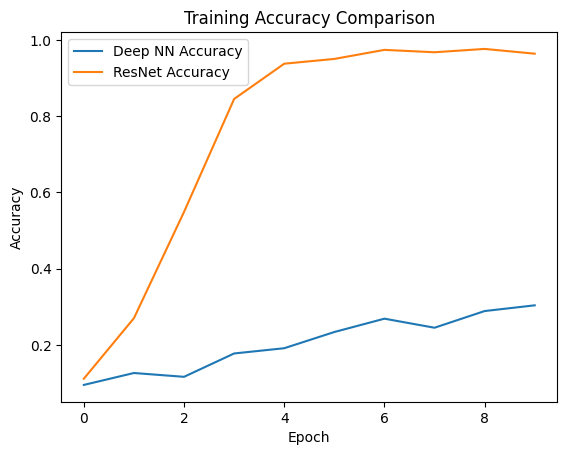

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Define a simple deep neural network
# TODO: make it deeper
def build_deep_nn():
    model = models.Sequential()
    model.add(layers.Dense(512, activation="relu", input_shape=(784,)))
    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dense(10, activation="softmax"))
    return model

# Define a ResNet-like deep neural network
def build_resnet():
    input_layer = layers.Input(shape=(784,))
    x = layers.Dense(512, activation="relu")(input_layer)
    for _ in range(10): # Adding 10 residual blocks
        residual = x # residual = F(x) - x # різниця
        # two stacked blocks
        x = layers.Dense(512, activation="relu")(x)
        x = layers.Dense(512, activation=None)(x) # No activation after the second layer, https://stats.stackexchange.com/questions/623551/no-activation-function-between-two-convolutional-layers-in-munit/ ??
        x = layers.Add()([x, residual]) # Adding the shortcut connection
        x = layers.Activation("relu")(x)
    output_layer = layers.Dense(10, activation="softmax")(x)
    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model


# Generate synthetic data
num_samples = 1000
input_data = np.random.randn(num_samples, 784)
labels = np.random.randint(0, 10, size=(num_samples,))

# Build and compile th deep neura; network
deep_nn = build_deep_nn()
deep_nn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the deep neural network
deep_nn_history = deep_nn.fit(input_data, labels, epochs=10, batch_size=32, validation_split=0.2)

# Build and compile the ResNet-like neural network
resnet = build_resnet()
resnet.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]) 

# Train the ResNet-like neural network
resnet_history = resnet.fit(input_data, labels, epochs=10, batch_size=32, validation_split=0.2)

# Plot the training history
plt.plot(deep_nn_history.history["accuracy"], label="Deep NN Accuracy")
plt.plot(resnet_history.history["accuracy"], label="ResNet Accuracy")
plt.title("Training Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [3]:
# The modified model for the cats and dogs task from CNN_add_preprocessed_layers_cats_dogs_extra.ipynb

from tensorflow.keras import layers, models

# Define the residual block
def residual_block(x, filters, kernel_size):
    shortcut = x

    # First convolutional layer
    x = layers.Conv2D(filters, kernel_size, padding="same")(x)
    x = layers.BatchNormalization()(x) # https://www.neuralception.com/objectdetection-batchnorm/#:~:text=In%20summary%2C%20batch%20normalization%20is,normalization%20offers%20some%20regularization%20effect. ??
    x = layers.Activation("relu")(x)

    # Second convolutional layer
    x = layers.Conv2D(filters, kernel_size, padding="same")(x)
    x = layers.BatchNormalization()(x)

    # Add the shortcut connection
    if shortcut.shape[-1] != filters: # If number of channels is not equel, apply 1x1 convolution to match dimensions
        shortcut = layers.Conv2D(filters, (1, 1), padding="same")(shortcut)
    x = layers.add([shortcut, x])
    x = layers.Activation("relu")(x)
    return x

# Build the model using residual layers
input_layer = layers.Input(shape=(150, 150, 3))
x = layers.Conv2D(32, (3, 3), activation="relu")(input_layer)
x = layers.MaxPooling2D((2, 2))(x)

# Add residual blocks
x = residual_block(x, filters=64, kernel_size=(3, 3))
x = layers.MaxPooling2D((2, 2))(x)

x = residual_block(x, filters=128, kernel_size=(3, 3))
x = layers.MaxPooling2D((2, 2))(x)

x = residual_block(x, filters=128, kernel_size=(3, 3))
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
output_layer = layers.Dense(1, activation="sigmoid")(x)

# Create model
model_res_net = models.Model(inputs=input_layer, outputs=output_layer)

In [4]:
model_res_net.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

In [5]:
destination = "." 

train_dir = f"{destination}/train/"
validation_dir = f"{destination}/validation"
test_dir = f"{destination}/test"

batch_size = 32

train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),
    batch_size=batch_size,
    color_mode="rgb"
)

validation_data = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(150, 150),
    batch_size=batch_size,
    color_mode="rgb"
)

test_data = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(150, 150),
    batch_size=batch_size,
    color_mode="rgb"
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint
# No checkpoints used here because they would result from training on part of the data

epochs = 15

history = model_res_net.fit(
    train_data,
    steps_per_epoch=len(train_data)//epochs,
    epochs=epochs,
    validation_data=validation_data
)

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5646 - loss: 446.9818 - val_accuracy: 0.5000 - val_loss: 167.7209
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4812 - loss: 122.0691 - val_accuracy: 0.5000 - val_loss: 42.6921
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5312 - loss: 30.5964 - val_accuracy: 0.5000 - val_loss: 124.3891
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5312 - loss: 40.7210 - val_accuracy: 0.4980 - val_loss: 3.7654
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4323 - loss: 29.7992 - val_accuracy: 0.5000 - val_loss: 88.1222
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6177 - loss: 12.2745 - val_accuracy: 0.5000 - val_loss: 29.7590
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4615 - loss: 13.0160 - val_accuracy: 0.5000 - val_loss: 40.7037
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5229 - loss: 6.6917 - val_accuracy: 0.4970 - val_loss: 8.3302

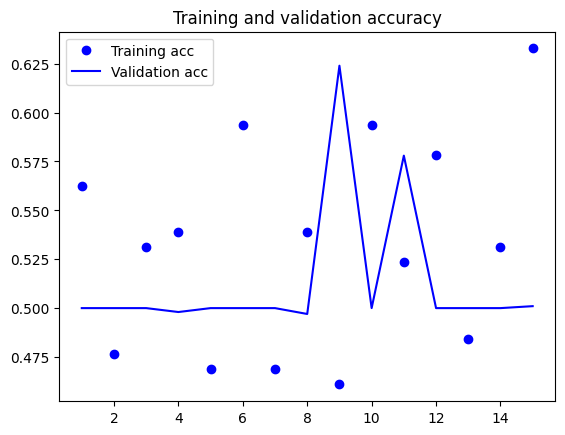

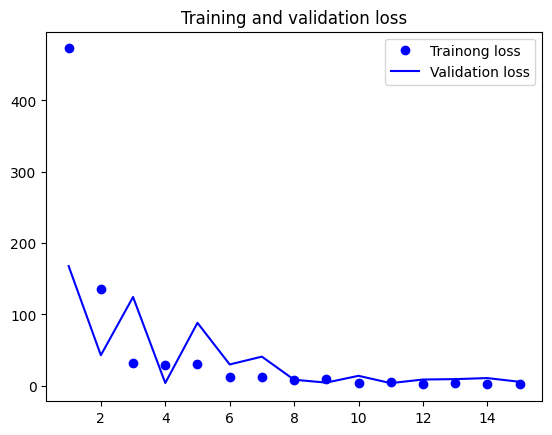

In [7]:
import matplotlib.pyplot as plt


acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Trainong loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [8]:
model_res_net.save("res_net.keras")

In [9]:
model_res_net.evaluate(test_data)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.4872 - loss: 5.5914


[5.396782398223877, 0.5]

ResNet Versions: https://medium.com/mlearning-ai/a-quick-overview-of-resnet-models-f8ed277ae81e

## Pretrained Models

In [10]:
model_res_net.layers

[<InputLayer name=input_layer_2, built=True>,
 <Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <BatchNormalization name=batch_normalization, built=True>,
 <Activation name=activation_10, built=True>,
 <Conv2D name=conv2d_2, built=True>,
 <Conv2D name=conv2d_3, built=True>,
 <BatchNormalization name=batch_normalization_1, built=True>,
 <Add name=add_10, built=True>,
 <Activation name=activation_11, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Conv2D name=conv2d_4, built=True>,
 <BatchNormalization name=batch_normalization_2, built=True>,
 <Activation name=activation_12, built=True>,
 <Conv2D name=conv2d_5, built=True>,
 <Conv2D name=conv2d_6, built=True>,
 <BatchNormalization name=batch_normalization_3, built=True>,
 <Add name=add_11, built=True>,
 <Activation name=activation_13, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Conv2D name=conv2d_7, built=True>,
 <BatchNormalizati

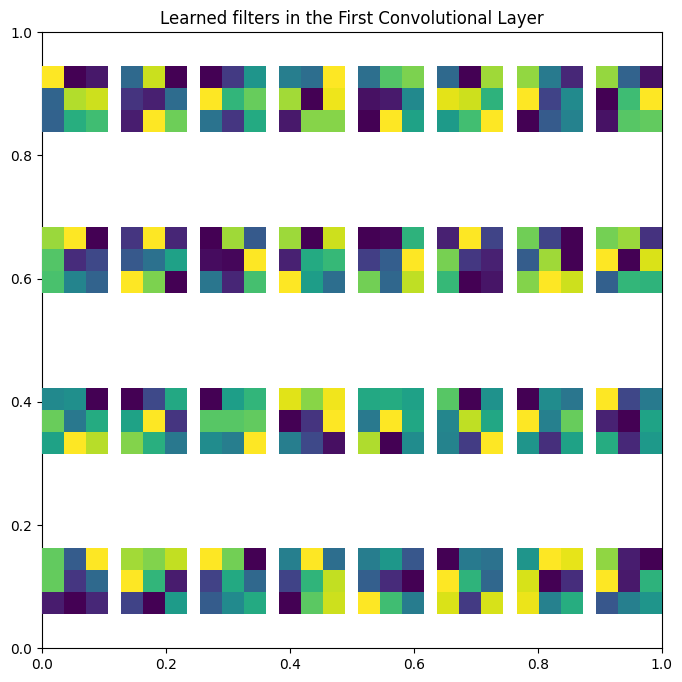

In [12]:
# Extract the filters from the first convolutional layer - feature extraction!
filters = model_res_net.layers[1].get_weights()[0]

# Visualize the learned filters
# Learned filters:
# The first part of the code visualizes the learned filters from the first convolutional layer. Each filter is a small matrix
# of weights that slides over the input image, capturing diggerent features.

plt.figure(figsize=(8, 8))
plt.title("Learned filters in the First Convolutional Layer")
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(filters[:, :, 0, i])
    plt.axis("off")
plt.show()

In [13]:
from tensorflow.keras.applications import ResNet50

ResNet_50 = ResNet50(weights=None)
# parameter number:
ResNet_50.count_params()

25636712

In [14]:
ResNet_50.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

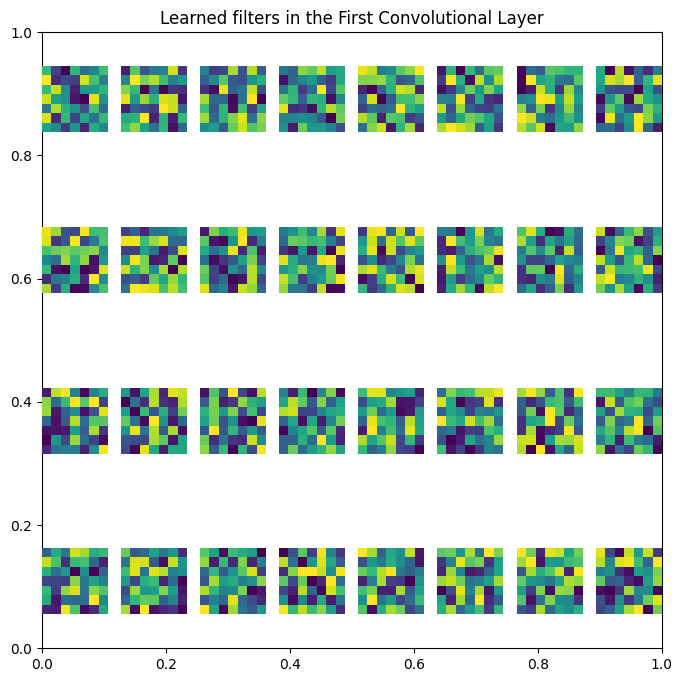

In [15]:
# Extract the filters from the first convolutional layer - feature extraction!
filters = ResNet_50.layers[2].get_weights()[0]

# Visualize the learned filters
# Learned filters:
# The first part of the code visualizes the learned filters from the first convolutional layer. Each filter is a small matrix
# of weights that slides over the input image, capturing diggerent features.

plt.figure(figsize=(8, 8))
plt.title("Learned filters in the First Convolutional Layer")
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(filters[:, :, 0, i])
    plt.axis("off")
plt.show()

In [16]:
# Pretrained model on ImageNet https://www.image-net.org
# https://paperswithcode.com/dataset/imagenet
# based on https://wordnet.princeton.edu
# The most highly-used subset of ImageNet is the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) 2012-2017 image classification
# This dataset spans 1000 object classes and contains 1,281,167 training images, 50,000 validation images and 100,000 test images

from tensorflow import keras

pretrained_resnet50 = keras.applications.ResNet50(
    weights="imagenet",
    classes=1000,
    classifier_activation="softmax"
)

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step


In [17]:
pretrained_resnet50.layers[2].weights[0][0][0]

<tf.Tensor: shape=(3, 64), dtype=float32, numpy=
array([[ 0.02825263, -0.01187372,  0.00151489,  0.0174512 ,  0.02267267,
        -0.07706022,  0.02593261,  0.00758947,  0.01483854,  0.00269824,
        -0.02794643,  0.01281348, -0.00239688, -0.02064885, -0.00565647,
        -0.01334927, -0.07256436, -0.04735989,  0.02042213,  0.06503097,
        -0.00141359,  0.0067685 , -0.00452705,  0.00789207,  0.0037927 ,
        -0.02793706, -0.02059007, -0.01074472, -0.03362909, -0.00028938,
        -0.01099383,  0.00777401, -0.02380833,  0.00196355,  0.04691625,
         0.00554846,  0.01841898, -0.01014032, -0.01754054,  0.09017435,
         0.02368956, -0.02602403,  0.01441176, -0.01233377, -0.01345379,
        -0.00706803, -0.02015607, -0.012672  , -0.0035574 ,  0.00865486,
         0.07378456,  0.0110056 ,  0.03461925,  0.01144895,  0.001062  ,
         0.00103144,  0.00486954,  0.02316773,  0.0355238 , -0.00459298,
        -0.00914957, -0.0107004 , -0.05279828, -0.00136667],
       [ 0.005

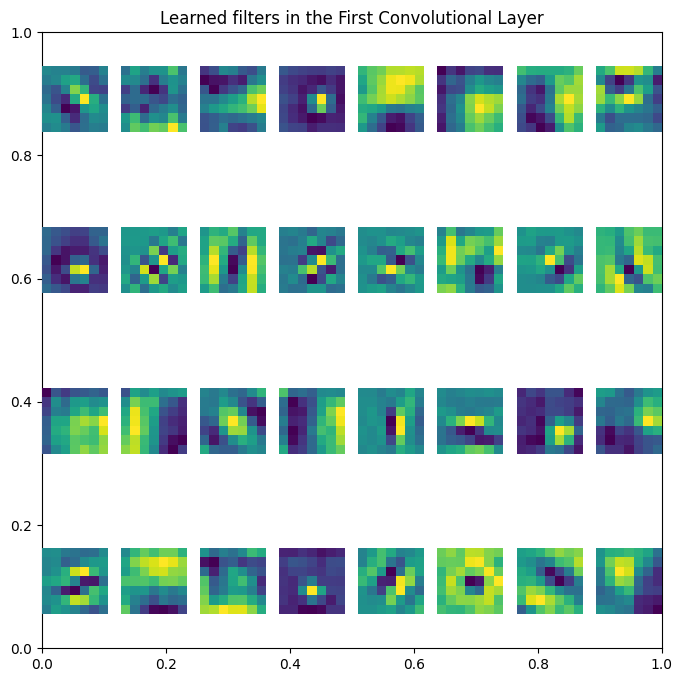

In [18]:
# Extract the filters from the first convolutional layer - feature extraction!
filters = pretrained_resnet50.layers[2].get_weights()[0]

# Visualize the learned filters
# Learned filters:
# The first part of the code visualizes the learned filters from the first convolutional layer. Each filter is a small matrix
# of weights that slides over the input image, capturing diggerent features.

plt.figure(figsize=(8, 8))
plt.title("Learned filters in the First Convolutional Layer")
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(filters[:, :, 0, i])
    plt.axis("off")
plt.show()

#### zero shot learning:

https://en.wikipedia.org/wiki/Zero-shot_learning

In [20]:
import json
from urllib import request

# Download the label mapping file
url = "https://raw.githubusercontent.com/raghakot/keras-vis/master/resources/imagenet_class_index.json"
response = request.urlopen(url)
data = json.loads(response.read())

# Create a dictionary to map class indices to labels
label_mapping = {int(idx): label for idx, (_, label) in data.items()}

# Print the label mapping
print(label_mapping)

{0: 'tench', 1: 'goldfish', 2: 'great_white_shark', 3: 'tiger_shark', 4: 'hammerhead', 5: 'electric_ray', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich', 10: 'brambling', 11: 'goldfinch', 12: 'house_finch', 13: 'junco', 14: 'indigo_bunting', 15: 'robin', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water_ouzel', 21: 'kite', 22: 'bald_eagle', 23: 'vulture', 24: 'great_grey_owl', 25: 'European_fire_salamander', 26: 'common_newt', 27: 'eft', 28: 'spotted_salamander', 29: 'axolotl', 30: 'bullfrog', 31: 'tree_frog', 32: 'tailed_frog', 33: 'loggerhead', 34: 'leatherback_turtle', 35: 'mud_turtle', 36: 'terrapin', 37: 'box_turtle', 38: 'banded_gecko', 39: 'common_iguana', 40: 'American_chameleon', 41: 'whiptail', 42: 'agama', 43: 'frilled_lizard', 44: 'alligator_lizard', 45: 'Gila_monster', 46: 'green_lizard', 47: 'African_chameleon', 48: 'Komodo_dragon', 49: 'African_crocodile', 50: 'American_alligator', 51: 'triceratops', 52: 'thunder_snake', 53: 'ringneck_snake', 54: 'hogn

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


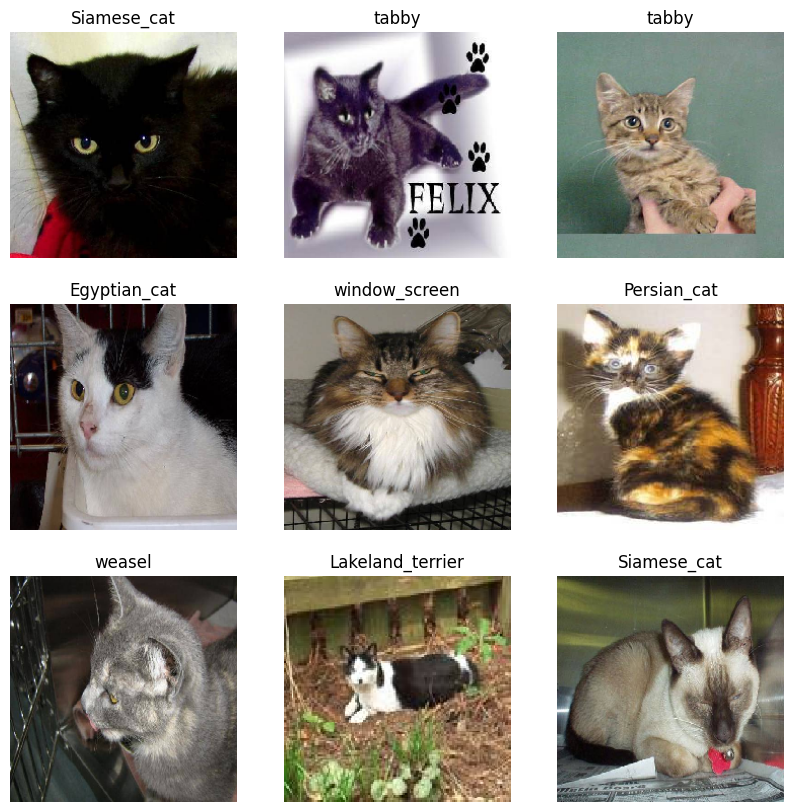

In [24]:
import os
from tensorflow.keras.preprocessing import image

fnames = [
    os.path.join(test_dir + "/cats", fname)
    for fname in os.listdir(test_dir + "/cats")
]

plt.figure(figsize=(10, 10))
for i in range(9):
    img_path = fnames[i]
    img = image.load_img(img_path, target_size=(224, 224))

    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.array_to_img(x[0]))
    prediction = pretrained_resnet50.predict(x)[0]
    predicted_class = np.argmax(prediction, axis=0)
    predicted_lable = label_mapping[predicted_class]
    
    plt.title(f"{predicted_lable}")
    # plt.title(f"{predicted_lable}, {prediction}")
    plt.axis("off")

In [25]:
prediction

array([2.62084594e-08, 6.48993606e-08, 1.49703567e-07, 8.91525005e-08,
       9.90873801e-08, 2.57822899e-06, 3.59071350e-08, 6.33092085e-08,
       1.01414152e-07, 1.65924632e-07, 1.92242400e-09, 4.61573890e-09,
       1.64347724e-09, 2.11431961e-09, 5.33119007e-08, 1.11089875e-08,
       2.64875730e-08, 4.60242954e-05, 5.24740926e-07, 5.30957536e-08,
       1.09525828e-08, 1.87176656e-08, 2.20049934e-09, 2.28263151e-08,
       4.07348573e-08, 8.32176994e-09, 1.37700669e-08, 6.51718501e-09,
       8.20024137e-09, 1.20352768e-08, 7.15427495e-09, 2.89845694e-08,
       2.56570565e-09, 1.53820547e-08, 7.51789742e-08, 2.82928454e-08,
       2.42257954e-07, 4.63599861e-08, 1.49329615e-08, 3.17008713e-08,
       1.43316088e-08, 3.40888455e-08, 1.65910720e-07, 5.54563364e-08,
       2.12078728e-08, 6.96200715e-08, 1.05114815e-08, 6.11220443e-08,
       1.27252562e-07, 1.38180027e-08, 3.55760257e-08, 2.90365308e-04,
       3.60991379e-08, 2.42106779e-08, 2.17827136e-07, 6.40323847e-08,
      

https://keras.io/api/applications/resnet/

https://www.analyticsvidhya.com/blog/2021/03/introduction-to-the-architecture-of-alexnet/

https://medium.com/@kyan7472/these-are-the-5-best-pre-trained-neural-networks-23798e61a043

In [33]:
train_data_224 = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb"
)

validation_data_224 = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb"
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [34]:
# finetune the ResNet
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense
from keras.optimizers import Adam
# from keras.optimizers.legacy import Adam

num_classes = 1

# Load pretrained ResNet50 model without top layers
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Add your classifier
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)
predictions = Dense(num_classes, activation="softmax")(x) # num_classes is the number of classes in your dataset

model_finetuned = Model(inputs=base_model.input, outputs=predictions)

# Freeze some layers 
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model_finetuned.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]) # optimazer=Adam(lr=0.001)

epochs = 5

#Train the model
model_finetuned.fit(
    train_data_224,
    epochs=epochs,
    validation_data=validation_data_224
)

Epoch 1/5


c:\Users\yulic\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:827: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 53s 792ms/step - accuracy: 0.4770 - loss: 0.7351 - val_accuracy: 0.5000 - val_loss: 0.0925
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 790ms/step - accuracy: 0.4769 - loss: 0.0466 - val_accuracy: 0.5000 - val_loss: 0.0737
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 48s 772ms/step - accuracy: 0.4730 - loss: 0.0267 - val_accuracy: 0.5000 - val_loss: 0.0734
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 777ms/step - accuracy: 0.4784 - loss: 0.0393 - val_accuracy: 0.5000 - val_loss: 0.0958
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 782ms/step - accuracy: 0.4805 - loss: 0.0117 - val_accuracy: 0.5000 - val_loss: 0.0845


In [ ]:
# Optionally, fine-tuning by unfreezing some layers

"""
for layer in model.layers [:100]:
    layer.trainable = False
for layer in model.layers [100:]:
    layer.trainable = True

# Continue training
model.compile(optimizer=Adam(lr=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(
    train_data,
    epochs=1,
    batch_size=32,
    validation_data=validation_data
)
"""

https://keras.io/examples/vision/yolov8/

https://github.com/onnx/models